# KNN and Bayes analysis

### Import required libraries 

In [75]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [76]:
# load dataset
titanic_train = pd.read_csv('data/train.csv')
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### EDA

<AxesSubplot:>

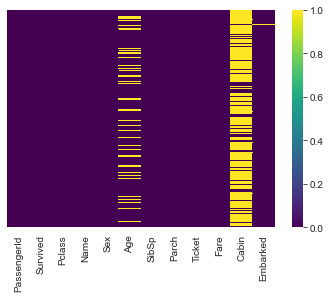

In [78]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cmap='viridis')
#This shows that cabin ahs so many missing data while age has substantial missing values 


In [79]:
sns.set_style('whitegrid')

<AxesSubplot:xlabel='Survived', ylabel='count'>

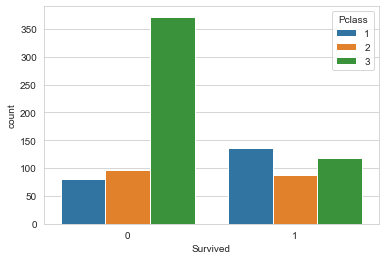

In [80]:
#Check survived against pclass
sns.countplot(x='Survived', hue='Pclass', data=titanic_train)

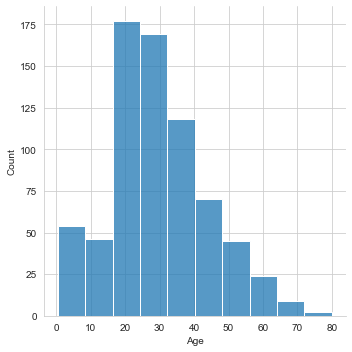

In [81]:
#Check age distribution using displot
sns.displot(titanic_train['Age'],bins=10)

<AxesSubplot:ylabel='Frequency'>

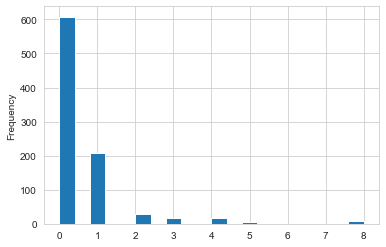

In [82]:
#Check people with siblings on board using histogram
titanic_train['SibSp'].plot.hist(bins=20)
#shows that many people did not have siblings or spuces on board

In [83]:
#import cufflinks to enable you use iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
titanic_train['Fare'].iplot(kind='hist')

<AxesSubplot:>

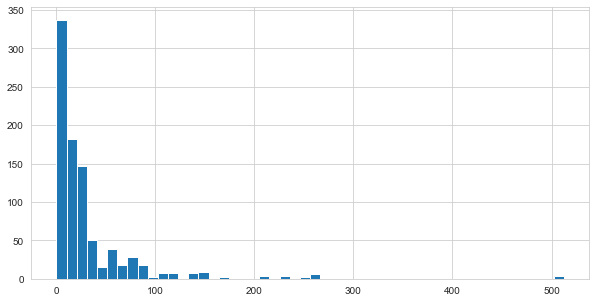

In [84]:
titanic_train['Fare'].hist(bins=50, figsize=(10,5))

### Data cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

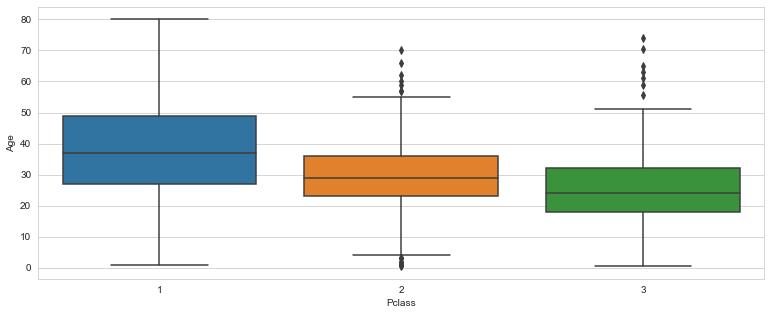

In [85]:
#Filling missing values in age using mean of age per pclass column
plt.figure(figsize=(13,5))
sns.boxplot(x='Pclass',y='Age', data=titanic_train)

In [86]:
round(titanic_train[titanic_train['Pclass']==1]['Age'].mean())

38

In [87]:
# sns.pairplot(titanic_train,hue='Survived')

In [88]:
#create a function to add age 

def add_age(cols):
    Age = cols[0]
    pclass = cols[1]

    if pd.isnull(Age):

        age = round(titanic_train[titanic_train['Pclass']==pclass]['Age'].mean())
        return age
    else:
        return Age
       
    

In [89]:
titanic_train['Age'] = titanic_train[['Age','Pclass']].apply(add_age,axis=1)

<AxesSubplot:>

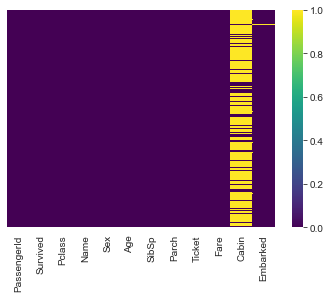

In [90]:
sns.heatmap(titanic_train.isnull(),yticklabels=False,cmap='viridis')

In [91]:
titanic_train.drop('Cabin', axis=1, inplace=True)

In [92]:
titanic_train.dropna(inplace=True)

In [93]:
# Deal with categorical values 
sex= pd.get_dummies(titanic_train['Sex'],drop_first=True)
embarked= pd.get_dummies(titanic_train['Embarked'],drop_first=True)

In [94]:
titanic_train=pd.concat([titanic_train,sex,embarked],axis=1)

In [95]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [96]:
#drop columns that you dont need
titanic_train.drop(['PassengerId','Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [97]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 51.2 KB


## Implement solution using KNN 

### Standardize the variables 

In [98]:
from sklearn.preprocessing import StandardScaler

In [99]:
# titanic_train['Survived']


In [100]:
scaler = StandardScaler()
scaler.fit(titanic_train.drop(('Survived'), axis=1))

StandardScaler()

In [101]:
#Transform the features
scaled_features = scaler.transform(titanic_train.drop(('Survived'), axis=1))

In [102]:
# create a new dataframe of tranformed features
df_titanic_train = pd.DataFrame(scaled_features, columns=titanic_train.columns[1:])

In [103]:
df_titanic_train.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0.825209,-0.548070,0.431350,-0.474326,-0.500240,0.735342,-0.307941,0.616794
1,-1.572211,0.666757,0.431350,-0.474326,0.788947,-1.359911,-0.307941,-1.621287
2,0.825209,-0.244363,-0.475199,-0.474326,-0.486650,-1.359911,-0.307941,0.616794
3,-1.572211,0.438977,0.431350,-0.474326,0.422861,-1.359911,-0.307941,0.616794
4,0.825209,0.438977,-0.475199,-0.474326,-0.484133,0.735342,-0.307941,0.616794


### train the data

In [104]:
#Import train test split from sklear
from sklearn.model_selection import train_test_split

In [105]:
X = df_titanic_train
y = titanic_train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### use knn to trained data

In [106]:
#Import KNeighbours classfier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [107]:
#fit the model to the trainign data
knn.fit(X_train,y_train)

KNeighborsClassifier()

### Make predictions and evaluate the model

In [108]:
from sklearn.metrics import classification_report, confusion_matrix

predict=knn.predict(X_test)
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.83      0.77      0.80       109
           1       0.68      0.75      0.71        69

    accuracy                           0.76       178
   macro avg       0.75      0.76      0.76       178
weighted avg       0.77      0.76      0.77       178



In [109]:
# Check the accuracy 
print(confusion_matrix(y_test,predict))

[[84 25]
 [17 52]]


### Checka  better k value

In [110]:
#Create emptry error rat
error_rate =[]
for i in range(1,50):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    new_predict = knn.predict(X_test)
    error_rate.append(np.mean(new_predict != y_test))
    


Text(0, 0.5, 'error rate')

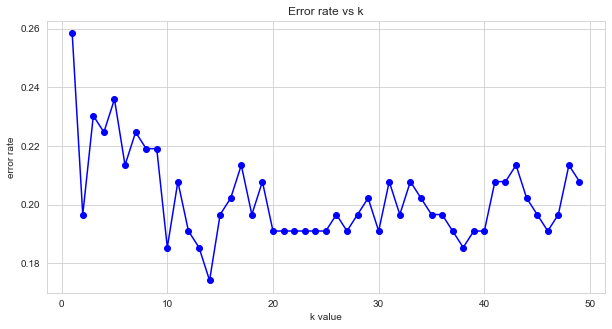

In [111]:
#Visualize to pick better value
plt.figure(figsize=(10,5))
plt.plot(range(1,50), error_rate, color='blue', marker='o')
plt.title('Error rate vs k')
plt.xlabel('k value')
plt.ylabel('error rate')

In [112]:
#Import KNeighbours classfier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
predict = knn.predict(X_test)

print(classification_report(y_test,predict))
print('-+_+_+_+_+_+_+_+_+_+_+_+_+_+')
print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.82      0.89      0.85       109
           1       0.80      0.68      0.73        69

    accuracy                           0.81       178
   macro avg       0.81      0.79      0.79       178
weighted avg       0.81      0.81      0.81       178

-+_+_+_+_+_+_+_+_+_+_+_+_+_+
[[97 12]
 [22 47]]


In [113]:
# # load datasets 
# spambase = pd.read_fwf("data/spambase.data",  sep=';')
# spambase